In [ ]:
!pip install nltk
!pip install textblob

In [ ]:
#TODO
#Change Comma delimiter into semicolon delimeter or some other char, because people use comma in their reviews.
nltk.download('punkt')
nltk.download('stopwords')

In [16]:
#Import Libraries for sentiment analysis, tokenizing data
import matplotlib.pyplot as plt
import nltk
from textblob import TextBlob
import pandas as pd
import os
from datetime import date


In [68]:
# the dates for which you start analyzing the reviews and for which you stop
time_start="04/14/2023"
time_end="04/20/2023"


In [23]:
#Load reviews from csv file







#the starting date of a csv file and the ending date

#function that for a starting time until an ending time will analyze the reviews(extract keywords, semantic analysis
#and frequency counter for every keyword to check how many times it appears in a positive respectively negative
#review ordered by day
def reviews_to_analysis(time_start,time_end, name_starting_file):
    list_reviews=[]
    data_end=" "
    data_start=" " 
    previous_data_end=["0","0","0"]
    range_months=[i for i in range(int(time_start[:2]) ,int(time_end[:2])+1)]
    #boolean that will stop the analyzing
    stop_reading_data=False
    #iteration of csv files
    i=1
    while (stop_reading_data==False):
        #if csv file exists
        #note that csv files should be ordered by number
        #so of the game pokemon go, the csv files should be ordered
        #for example pokemon_go_1, pokemon_go_2......
        if(os.path.isfile("{}_{}.csv".format(name_starting_file, i))):
            data =pd.read_csv("{}_{}.csv".format(name_starting_file, i), sep=",", engine="python", error_bad_lines=False)
            print("i:", i)
            print(len(data))
            #if csv file nonempty, else stop analyzing
            if(len(data) !=0):
                if(data_end!=" "):
                    previous_data_end = data_end
                #ending date of csv file entry and starting date of csv file entry
                data_end=str(data["at"][-1:]).split()[1].split('-')
                data_start=data["at"][0].split()[0].split("-")
                range_months_file= [i for i in range(int(data_start[1]) ,int(data_end[1])+1)]
                delta_months=int(data_start[1])-int(data_end[1])
                #Change this, ugly code, works for now
                temp_list=[]
                for l in range_months_file:
                    if(l in range_months):
                        temp_list.append(l)

                #some checks to speed up looking through the csv file
                if(int(data_start[1])<int(time_start[:2])):
                    stop_reading_data=True
                elif(int(data_end[1])>int(time_end[:2])):
                    i+=1
                    continue
                elif(len(temp_list)>0  and int(data_start[2])<int(time_start[3:5])):
                    stop_reading_data=True
                elif(len(temp_list)>0 and int(data_end[2])>int(time_end[3:5])):
                    i+=1
                    continue

                else:

                    #dates of csv file entries
                    list_date=data["at"].apply(lambda x: x.split()[0].split("-"))
                    print(list_date)

                    k=0
                    #look for the csv file and do the analysis
                    for j in range(1, len(list_date)):
                        #if there is a change from one date to the other, analyze and get the result with the date in a list
                        if(list_date[j][2]!=list_date[j-1][2]):
                            #this is so that when the previous csv file is ordered by a certain date and in the current
                            #csv file there is the same date to make sure the results are merged for that date
                            if(data_start[2]==previous_data_end[2]):
                                x=analyze_reviews(data["content"][k:j])
                                z=merge_dicts(x,list_reviews[-1][0])
                                list_reviews[-1] = [z,list_reviews[-1][1]]
                                previous_data_end=["0","0","0"]

                            else:
                                list_reviews.append([analyze_reviews(data["content"][k:j]),list_date[j-1]])

                            k=j
                        #else end of document, analyze the rest of the data that has not been analyzed
                        elif(j==len(list_date)-1):
                            if(list_date[j][2]==previous_data_end[2]):
                                x=analyze_reviews(data["content"][k:j])
                                z=merge_dicts(x,list_reviews[-1][0])
                                list_reviews[-1] = [z,list_reviews[-1][1]]
                                previous_data_end=["0","0","0"]
                            else:
                                list_reviews.append([analyze_reviews(data["content"][k:j]),list_date[j]])

            else:
                stop_reading_data=True
        else:
            stop_reading_data= True  
        i+=1
    return list_reviews



In [24]:
list_reviews= reviews_to_analysis(time_start,time_end,"data")


C:\Users\HP001\AppData\Local\Temp\ipykernel_4980\3722402582.py:30: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data =pd.read_csv("{}_{}.csv".format(name_starting_file, i), sep=",", engine="python", error_bad_lines=False)
Skipping line 2: ',' expected after '"'
Skipping line 8: ',' expected after '"'
Skipping line 12: ',' expected after '"'
Skipping line 13: ',' expected after '"'
Skipping line 25: ',' expected after '"'
Skipping line 26: ',' expected after '"'
Skipping line 28: ',' expected after '"'
Skipping line 29: ',' expected after '"'
Skipping line 31: ',' expected after '"'
Skipping line 33: ',' expected after '"'
Skipping line 34: ',' expected after '"'
Skipping line 37: ',' expected after '"'
Skipping line 42: ',' expected after '"'
Skipping line 46: ',' expected after '"'
Skipping line 48: ',' expected after '"'
Skipping line 49: ',' expected after '"'
Skipping line 50: ',' expect

690
0      [2023, 04, 20]
1      [2023, 04, 20]
2      [2023, 04, 20]
3      [2023, 04, 20]
4      [2023, 04, 20]
            ...      
685    [2023, 04, 16]
686    [2023, 04, 16]
687    [2023, 04, 16]
688    [2023, 04, 16]
689    [2023, 04, 16]
Name: at, Length: 690, dtype: object


C:\Users\HP001\AppData\Local\Temp\ipykernel_4980\3722402582.py:30: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data =pd.read_csv("{}_{}.csv".format(name_starting_file, i), sep=",", engine="python", error_bad_lines=False)
Skipping line 2: ',' expected after '"'
Skipping line 8: ',' expected after '"'
Skipping line 12: ',' expected after '"'
Skipping line 13: ',' expected after '"'
Skipping line 25: ',' expected after '"'
Skipping line 26: ',' expected after '"'
Skipping line 28: ',' expected after '"'
Skipping line 29: ',' expected after '"'
Skipping line 30: ',' expected after '"'
Skipping line 33: ',' expected after '"'
Skipping line 38: ',' expected after '"'
Skipping line 40: ',' expected after '"'


30
0     [2023, 04, 16]
1     [2023, 04, 16]
2     [2023, 04, 16]
3     [2023, 04, 16]
4     [2023, 04, 16]
5     [2023, 04, 16]
6     [2023, 04, 16]
7     [2023, 04, 16]
8     [2023, 04, 16]
9     [2023, 04, 16]
10    [2023, 04, 16]
11    [2023, 04, 16]
12    [2023, 04, 16]
13    [2023, 04, 16]
14    [2023, 04, 16]
15    [2023, 04, 16]
16    [2023, 04, 16]
17    [2023, 04, 16]
18    [2023, 04, 16]
19    [2023, 04, 16]
20    [2023, 04, 15]
21    [2023, 04, 15]
22    [2023, 04, 15]
23    [2023, 04, 15]
24    [2023, 04, 15]
25    [2023, 04, 15]
26    [2023, 04, 15]
27    [2023, 04, 15]
28    [2023, 04, 15]
29    [2023, 04, 15]
Name: at, dtype: object


In [19]:
def merge_dicts(x, y):
    """Given two dictionaries, merge them into a new dict as a shallow copy."""
    z = x.copy()
    z.update(y)
    return z

In [20]:


def analyze_reviews(reviews):
    keyword_list={}
    for review in reviews:
        review = str(TextBlob(review).correct())
        #tokenize review
        tokens = nltk.word_tokenize(review)
        #ignore stop_words
        stop_words = set(nltk.corpus.stopwords.words('english'))
        tokens = [token.lower() for token in tokens if token.lower() not in stop_words]
        #get the sentiment of the review
        sentiment = TextBlob(review).sentiment.polarity
       # print("Keywords: ", tokens)
       # print("Sentiment polarity: ", sentiment)
        sentiment_in_words="neutral"
        if (sentiment<0):
            sentiment_in_words="negative"
        elif(sentiment>=0):
            sentiment_in_words="positive"
       # print(sentiment_in_words)
        #for every keyword, count how many times they appear in a negative respectively positive review
        for token in tokens:
            if token in keyword_list:
                if sentiment<0:
                    keyword_list[token][0]+=1
                elif sentiment>=0:
                    keyword_list[token][1]+=1
            else:
                if sentiment<0:
                    keyword_list[token]=[1,0]
                elif sentiment>=0:
                    keyword_list[token]=[0,1]
        
    return keyword_list







In [78]:

#return for a keyword per day the amount of times the keyword appears in a positive respectively negative review.
def keyword_counter(keyword,list_reviews,time_frame):
    list_time_keyword=[]
    for i in range(time_frame):
        if(i in range(len(list_reviews))):
            
            if(keyword in list_reviews[i][0]):
                list_time_keyword.append([list_reviews[i][0][keyword], list_reviews[i][1]])
            else:
                list_time_keyword.append([[0,0], ['0','0','0']])
        else: list_time_keyword.append([[0,0], ['0', '0', '0']])
    return list_time_keyword



In [84]:
#make a graph of the output of the keyword_counter function

def make_graph(keyword, data_negative,data_positive,time_frame,time_start,time_end):
    
    fig, ax = plt.subplots(1, figsize=(20, 5))
    x = range(time_frame)
    ax.plot(x, data_negative, label="negative review", color="red")
    ax.plot(x, data_positive, label="positive review", color="blue")
    ax.set(title="Positive and Negative reviews with the keyword {}".format(keyword),
           xlabel="Date", ylabel="Number of Reviews")
    xi = pd.date_range(time_start, time_end, freq='d')
    ax.set_xticks(range(time_frame))
    ax.set_xticklabels(xi.strftime('%m/%d/%Y'))
    ax.legend()
    plt.show()

In [75]:


#get the amount of days between two dates
def get_time_frame(time_start,time_end):
    
    d0=date(int(time_start[-4:]),int(time_start[:2]),int(time_start[3:5]))
    d1=date(int(time_end[-4:]),int(time_end[:2]),int(time_end[3:5]))
    delta = d1-d0
    time_frame=delta.days+1
    return time_frame
    

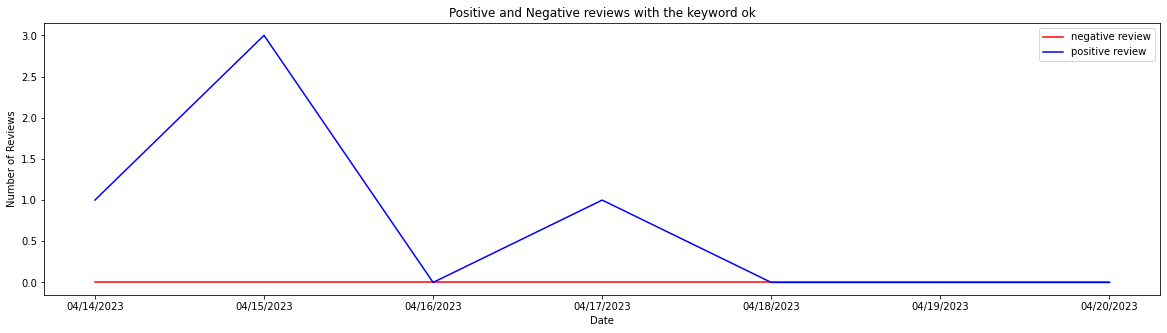

In [85]:
keyword="ok"
time_frame= get_time_frame(time_start,time_end)
list_time_keyword = keyword_counter(keyword,list_reviews,time_frame)
(data_negative,data_positive) = get_data_negpos(list_time_keyword)
make_graph(keyword,data_negative,data_positive,time_frame,time_start,time_end)

In [30]:


#get the data_negative and data_positive for a keyword per day
def get_data_negpos(list_time_keyword):
    data_negative=[list_time_keyword[i][0][0] for i in range(len(list_time_keyword))]
    data_positive=[list_time_keyword[i][0][1] for i in range(len(list_time_keyword))]
    return (data_negative,data_positive)
    

In [86]:
#keyword recommendation system per day

def keyword_recommendation(day,list_reviews):
    list_keywords_negative_reviews=[]
    list_keywords_positive_reviews=[]
    day_in_list = day.split("/")
    print(day_in_list)
    for i in range(len(list_reviews)):
        print(list_reviews[i][1])
        if(list_reviews[i][1]==day_in_list):
            #print(list_reviews[i][0])
            for j in list_reviews[i][0]:
                list_keywords_negative_reviews.append([j,list_reviews[i][0][j][0]])
                list_keywords_positive_reviews.append([j,list_reviews[i][0][j][1]])
            list_keywords_negative_reviews=sorted(list_keywords_negative_reviews,key=lambda x: x[1])
            list_keywords_positive_reviews=sorted(list_keywords_positive_reviews,key=lambda x:x[1])
            
            return [list_keywords_negative_reviews,list_keywords_positive_reviews]
            
                
                



In [27]:
(list_keywords_negative_reviews,list_keywords_positive_reviews) = keyword_recommendation(day,list_reviews)

['2023', '04', '19']
['2023', '04', '20']
['2023', '04', '19']


In [14]:
def get_reviews_by_keyword(keyword):
    arr_reviews=[]
    i=1
    stop_reading_data = False
    while (stop_reading_data==False):
        if(os.path.isfile("data_{}.csv".format(i))):
            data =pd.read_csv("data_{}.csv".format(i), sep=",", engine="python", error_bad_lines=False)
            if(len(data) !=0):
                for j in range(len(data["content"])):
                    if keyword in data["content"][j]:
                        arr_reviews.append([data["content"][j], data["at"][j]])
        else: stop_reading_data=True
        i+=1
    return arr_reviews
        

In [88]:
def make_graph_keywords(list_keywords_negative_reviews,list_keywords_positive_reviews):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

    keyword_negative = [i[0] for i in list_keywords_negative_reviews]
    freq_negative = [i[1] for i in list_keywords_negative_reviews]
    keyword_positive = [i[0] for i in list_keywords_positive_reviews]
    freq_positive = [i[1] for i in list_keywords_positive_reviews]

    ax1.bar(keyword_negative[-10:], freq_negative[-10:])
    ax1.set_title("Keywords with the most amount of negative reviews")
    ax1.set_xlabel("Keywords")
    ax1.set_ylabel("Frequency")

    ax2.bar(keyword_positive[-10:], freq_positive[-10:])
    ax2.set_title("Keywords with the most amount of positive reviews")
    ax2.set_xlabel("Keywords")
    ax2.set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()
    
    

['2023', '04', '19']
['2023', '04', '20']
['2023', '04', '19']


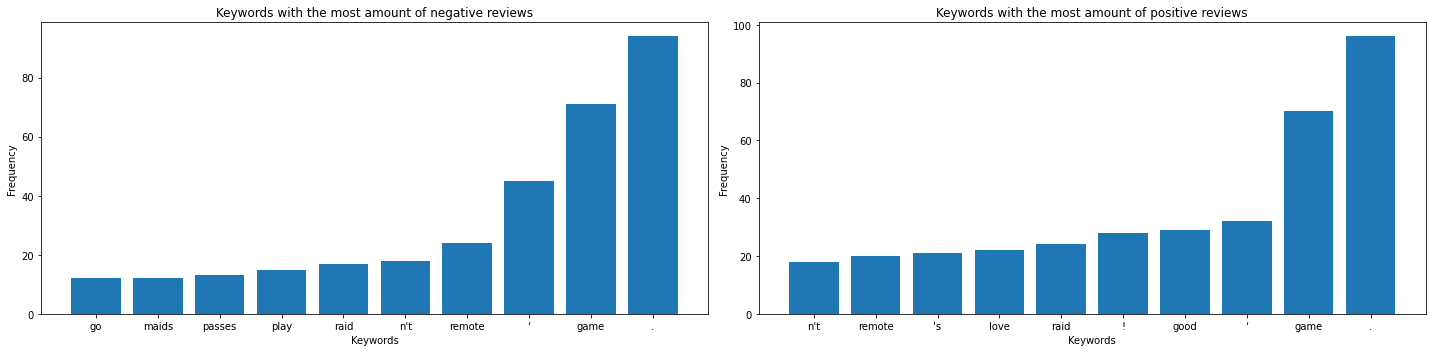

In [89]:
day = "2023/04/19"
(list_keywords_negative_reviews,list_keywords_positive_reviews) = keyword_recommendation(day,list_reviews)
make_graph_keywords(list_keywords_negative_reviews, list_keywords_positive_reviews)